## Chapter 30: Newton's Method in the Complex Plane

In [4]:
function newton(f::Function,df::Function,z0::Complex; max_steps=10, tol=1e-6)
  local dz=f(z0)/df(z0)
  local n = 0
  while abs(dz)>tol && n < max_steps
    z0 -= dz
    dz = f(z0)/df(z0)
    n+=1
  end
  z0
end

newton (generic function with 1 method)

In [5]:
newton(z->z^3+1,z->3z^2,3.0+0.1im)

-1.0000000004541594 - 1.7833965698829635e-10im

In [6]:
function newton(f::Function,df::Function,z0::Array{Complex{T},2}; max_steps=20) where T <: Real
  for i=1:max_steps
    z0 += -f.(z0)./df.(z0)
  end
  z0
end

newton (generic function with 2 methods)

In [7]:
arr = [complex(-2+i,-2+j) for i=0:4,j=0:4]

5×5 Array{Complex{Int64},2}:
 -2-2im  -2-1im  -2+0im  -2+1im  -2+2im
 -1-2im  -1-1im  -1+0im  -1+1im  -1+2im
  0-2im   0-1im   0+0im   0+1im   0+2im
  1-2im   1-1im   1+0im   1+1im   1+2im
  2-2im   2-1im   2+0im   2+1im   2+2im

In [8]:
Z=newton(z->z^3+1,z->3z^2,arr)

5×5 Array{Complex{Float64},2}:
    -1.0+0.0im          -1.0+0.0im       …     -1.0+0.0im
 -1.0005-0.000624543im  -1.0+0.0im          -1.0005+0.000624543im
     0.5-0.866025im      0.5-0.866025im         0.5+0.866025im
     0.5-0.866025im      0.5-0.866025im         0.5+0.866025im
     0.5-0.866025im      0.5-0.866025im         0.5+0.866025im

In [9]:
ang = map(z->mod(z,360),180/pi*angle.(Z))

5×5 Array{Float64,2}:
 180.0    180.0  180.0  180.0  180.0
 180.036  180.0  180.0  180.0  179.964
 300.0    300.0  NaN     60.0   60.0
 300.0    300.0  180.0   60.0   60.0
 300.0    300.0  180.0   60.0   60.0

In [10]:
findall(isnan,ang)

1-element Array{CartesianIndex{2},1}:
 CartesianIndex(3, 3)

In [11]:
ang[findall(isnan,ang)] .= 60.0

1-element view(::Array{Float64,2}, CartesianIndex{2}[CartesianIndex(3, 3)]) with eltype Float64:
 60.0

In [12]:
ang

5×5 Array{Float64,2}:
 180.0    180.0  180.0  180.0  180.0
 180.036  180.0  180.0  180.0  179.964
 300.0    300.0   60.0   60.0   60.0
 300.0    300.0  180.0   60.0   60.0
 300.0    300.0  180.0   60.0   60.0

In [13]:
index = round.(Int,(ang.-60)/120).+1

5×5 Array{Int64,2}:
 2  2  2  2  2
 2  2  2  2  2
 3  3  1  1  1
 3  3  2  1  1
 3  3  2  1  1

In [14]:
function rootIndex(Z::Array{Complex{T},2}) where T <: Real
  local ang = map(z->mod(z,360),180/pi*angle.(Z))
  ang[findall(isnan,ang)] .= 60.0
  index = round.(Int,(ang.-60)/120).+1
end

rootIndex (generic function with 1 method)

In [17]:
using IndirectArrays, Colors
colors = [colorant"red",colorant"green",colorant"yellow"]
A = IndirectArray(rootIndex(Z), colors)

In [71]:
save("test.png", A)

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1278
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278


0

In [28]:
using FileIO, ImageShow, Images

In [19]:
function buildGrid(;xmin=-2,xmax=2,ymin=-2,ymax=2,N=101)
  dx=(xmax-xmin)/(N-1)
  dy=(ymax-ymin)/(N-1)
  [complex(xmin+i*dx,ymax-j*dx) for j=0:N-1,i=0:N-1]
end

buildGrid (generic function with 1 method)

In [20]:
Z0 = buildGrid(N=401)

401×401 Array{Complex{Float64},2}:
 -2.0+2.0im   -1.99+2.0im   -1.98+2.0im   …  1.99+2.0im   2.0+2.0im
 -2.0+1.99im  -1.99+1.99im  -1.98+1.99im     1.99+1.99im  2.0+1.99im
 -2.0+1.98im  -1.99+1.98im  -1.98+1.98im     1.99+1.98im  2.0+1.98im
 -2.0+1.97im  -1.99+1.97im  -1.98+1.97im     1.99+1.97im  2.0+1.97im
 -2.0+1.96im  -1.99+1.96im  -1.98+1.96im     1.99+1.96im  2.0+1.96im
 -2.0+1.95im  -1.99+1.95im  -1.98+1.95im  …  1.99+1.95im  2.0+1.95im
 -2.0+1.94im  -1.99+1.94im  -1.98+1.94im     1.99+1.94im  2.0+1.94im
 -2.0+1.93im  -1.99+1.93im  -1.98+1.93im     1.99+1.93im  2.0+1.93im
 -2.0+1.92im  -1.99+1.92im  -1.98+1.92im     1.99+1.92im  2.0+1.92im
 -2.0+1.91im  -1.99+1.91im  -1.98+1.91im     1.99+1.91im  2.0+1.91im
 -2.0+1.9im   -1.99+1.9im   -1.98+1.9im   …  1.99+1.9im   2.0+1.9im
 -2.0+1.89im  -1.99+1.89im  -1.98+1.89im     1.99+1.89im  2.0+1.89im
 -2.0+1.88im  -1.99+1.88im  -1.98+1.88im     1.99+1.88im  2.0+1.88im
     ⋮                                    ⋱                  ⋮
 -2.0-1

In [21]:
Z=newton(z->z^3+1,z->3z^2,Z0)

401×401 Array{Complex{Float64},2}:
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im  …  0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im  …  0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im  …  0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
 -1.0+0.0im  -1.0+0.0im  -1.0+0.0im     0.5+0.866025im  0.5+0.866025im
     ⋮                               ⋱    

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1278
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278
┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1278


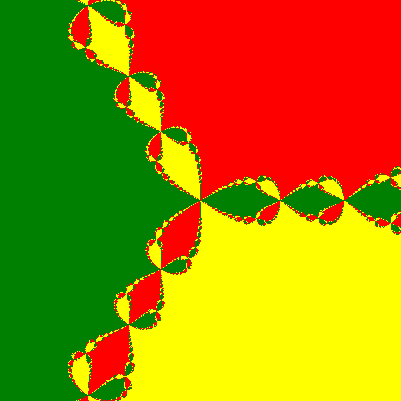

In [23]:
A = IndirectArray(rootIndex(Z), colors)

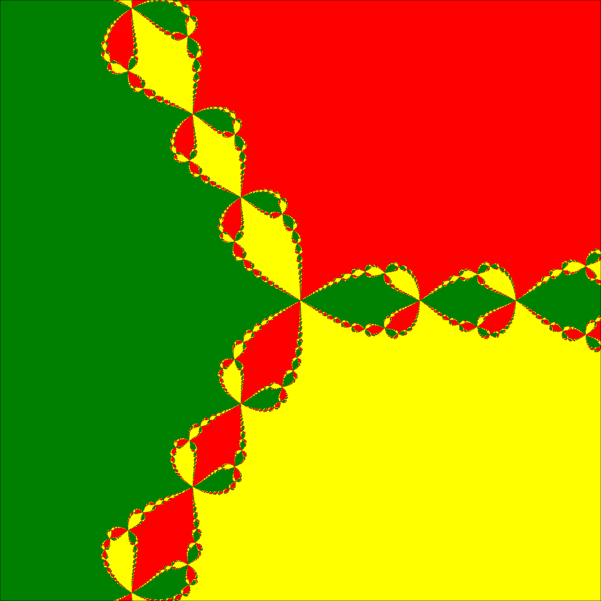

In [29]:
Z0 = buildGrid(N=1201)
Z=newton(z->z^3+1,z->3z^2,Z0)
A = IndirectArray(rootIndex(Z), colors)